In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread("main.png")
mask = cv2.imread("mask.png", cv2.IMREAD_GRAYSCALE)

In [25]:
masked_image = cv2.bitwise_and(image, image, mask=mask)

In [26]:
red_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
red_mask[mask != 0] = [0, 0, 255]

In [27]:
labelled_image = cv2.addWeighted(image, 0.7, red_mask, 0.3, 0)

In [28]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [29]:
mask_area = 0
for contour in contours:
    mask_area += cv2.contourArea(contour)

In [30]:
x, y, w, h = cv2.boundingRect(mask)
region = cv2.bitwise_and(image, image, mask=mask)
area = np.sum(mask != 0)

In [33]:
cv2.rectangle(labelled_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
#cv2.putText(labelled_image, 'Tumor', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0,  76],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

(-0.5, 629.5, 629.5, -0.5)

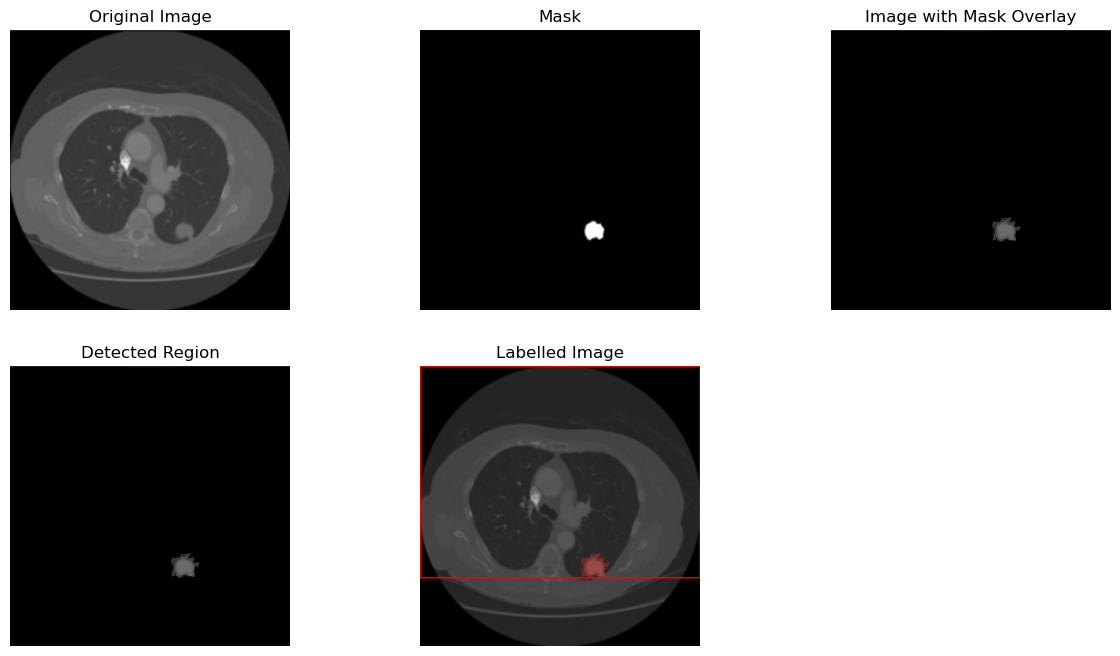

In [34]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Mask Overlay")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
plt.title("Detected Region")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(labelled_image, cv2.COLOR_BGR2RGB))
plt.title("Labelled Image")
plt.axis("off")